# CS640 Project Writeup

In this project, you will work on a Kaggle competition titled [ISIC 2024 - Skin Cancer Detection with 3D-TBP](https://www.kaggle.com/competitions/isic-2024-challenge/overview). This is a binary classification task in which you need to predict if the patient has skin cancer. The competition is already close, but we will explore the rich (training) dataset it provides in this class.

***

## Data

We will be using the training dataset from the original competition for this class project. The dataset has been downloaded and preprocessed. You can find it on SCC at */projectnb/cs640grp/materials/ISIC-2024_CS640*. **You should use this downloaded dataset only, not the original one on the website.**

The directory looks like the following.

In [ ]:
import os

project_dir = os.path.join(os.sep, 'projectnb', 'cs640grp', 'materials', 'ISIC-2024_CS640')
os.listdir(project_dir)

['test_metadata.csv',
 'submission.csv',
 'train_metadata.csv',
 'train_image',
 'test_image']

The CSV files store a list of attributes for each sample, and the image folders store a JPEG image per sample. The image names are sample IDs which can be found in the correpsonding CSV files. The submission.csv file is a template of your submission.

Let's first take a peek into the CSV files and a few sample images.

***

### Training Metadata

Note that in the metadata file, the **target** column is the label column.

In [ ]:
import pandas

df_train = pandas.read_csv(os.path.join(project_dir, "train_metadata.csv"))
df_train

id  target  age_approx     sex anatom_site_general  \
0            0       0        55.0    male     upper extremity   
1            1       0        50.0  female     posterior torso   
2            2       0        40.0  female     lower extremity   
3            3       0        50.0  female     upper extremity   
4            4       0        60.0    male     posterior torso   
...        ...     ...         ...     ...                 ...   
320842  320842       0        70.0     NaN     posterior torso   
320843  320843       0        45.0    male     posterior torso   
320844  320844       0        40.0    male      anterior torso   
320845  320845       0        40.0    male     lower extremity   
320846  320846       0        50.0    male      anterior torso   

        clin_size_long_diam_mm tbp_tile_type   tbp_lv_A  tbp_lv_Aext  \
0                         2.58     3D: white  21.989610    18.149720   
1                         2.90        3D: XP  21.153528    17.243578   
2                         4.38        3D: XP  20.569130    14.896040   
3                         2.76     3D: white  23.365559    18.483379   
4                         3.31        3D: XP  23.061540    18.730060   
...                        ...           ...        ...          ...   
320842                    3.60        3D: XP  19.985520    15.393206   
320843                    5.88     3D: white  17.846150    11.566220   
320844                   11.41        3D: XP  16.364410     6.870663   
320845                    4.02        3D: XP  13.500010    10.076300   
320846                    3.15        3D: XP  17.482757    12.255344   

         tbp_lv_B  ...  tbp_lv_norm_color  tbp_lv_perimeterMM  \
0       26.138980  ...           3.207238            7.162229   
1       28.471102  ...           2.749542            7.242474   
2       24.978840  ...           4.339059           14.451710   
3       30.853418  ...           1.650849            7.870664   
4       29.790280  ...           4.174303           10.950840   
...           ...  ...                ...                 ...   
320842  35.482277  ...           1.317773            9.854949   
320843  24.022090  ...           6.996178           16.388990   
320844  20.882192  ...           3.671125           28.208751   
320845  23.654770  ...           2.443795           11.177810   
320846  34.196833  ...           2.113237            8.872541   

        tbp_lv_radial_color_std_max  tbp_lv_stdL  tbp_lv_stdLExt  \
0                          1.181736     2.552678        2.169827   
1                          1.014255     2.979940        1.937938   
2                          1.233737     5.317332        1.839798   
3                          0.496438     2.770145        2.381648   
4                          1.521283     1.608716        1.997881   
...                             ...          ...             ...   
320842                     0.359343     1.018512        2.205429   
320843                     1.827318     8.247600        2.282445   
320844                     1.136926     3.310037        1.509960   
320845                     0.847317     2.623507        3.329334   
320846                     0.645124     3.542404        2.282705   

        tbp_lv_symm_2axis  tbp_lv_symm_2axis_angle    tbp_lv_x     tbp_lv_y  \
0                0.230000                       45 -439.338600  1230.412000   
1                0.292453                       65  -59.504822  1047.626465   
2                0.158025                        0 -223.811100   770.993000   
3                0.254237                       90 -440.008942  1140.614502   
4                0.461111                        0 -108.822000  1215.113000   
...                   ...                      ...         ...          ...   
320842           0.307692                      115   30.655060  1204.034302   
320843           0.208081                      140 -109.284200  1228.212000   
320844           0.181329                    

### Test Metadata

The test metadata file contains the same headers as the training one. Note that in this file, the **target** column is empty by design.

In [ ]:
df_test = pandas.read_csv(os.path.join(project_dir, "test_metadata.csv"))
df_test

id  target  age_approx     sex anatom_site_general  \
0          0     NaN        30.0    male     upper extremity   
1          1     NaN        75.0    male     upper extremity   
2          2     NaN        30.0    male     lower extremity   
3          3     NaN        45.0  female     upper extremity   
4          4     NaN        55.0    male      anterior torso   
...      ...     ...         ...     ...                 ...   
80207  80207     NaN        75.0    male     posterior torso   
80208  80208     NaN        50.0    male     upper extremity   
80209  80209     NaN        40.0  female     upper extremity   
80210  80210     NaN        75.0    male     posterior torso   
80211  80211     NaN        70.0    male     posterior torso   

       clin_size_long_diam_mm tbp_tile_type   tbp_lv_A  tbp_lv_Aext  \
0                        2.52     3D: white  20.739760    17.346250   
1                        2.63     3D: white  21.498600    17.128050   
2                       18.31        3D: XP  21.261867    15.949655   
3                        3.55        3D: XP  21.087236    15.657230   
4                        7.06     3D: white  22.121790    14.444030   
...                       ...           ...        ...          ...   
80207                    2.88     3D: white  20.565030    15.228920   
80208                    4.20     3D: white  16.314590    14.611030   
80209                    2.90        3D: XP  21.597580    17.705739   
80210                    3.32     3D: white  22.596327    20.186998   
80211                    3.14     3D: white  19.856977    16.932049   

        tbp_lv_B  ...  tbp_lv_norm_color  tbp_lv_perimeterMM  \
0      23.604410  ...           2.013941            9.113276   
1      26.919320  ...           3.554856            6.968501   
2      36.927874  ...           3.685572           67.921989   
3      31.419333  ...           2.082827           10.582854   
4      30.308130  ...           3.691011           19.856620   
...          ...  ...                ...                 ...   
80207  30.234170  ...           1.458585            8.111398   
80208  25.403000  ...           1.941789           11.952720   
80209  27.266721  ...           3.355798            8.872541   
80210  30.480790  ...           0.000000            9.033031   
80211  22.454427  ...           3.738181            9.340242   

       tbp_lv_radial_color_std_max  tbp_lv_stdL  tbp_lv_stdLExt  \
0                         0.793600     1.368380        3.130576   
1                         1.322546     2.980941        2.610491   
2                         1.323685     1.912243        3.394053   
3                         0.691356     1.349557        1.570233   
4                         0.989644     3.126280        2.467318   
...                            ...          ...             ...   
80207                     0.618510     2.274461        1.914292   
80208                     0.599103     1.422653        2.196585   
80209                     1.076741     3.248064        1.624508   
80210                     0.000000     1.321416        2.082772   
80211                     1.366712     3.948254        2.571864   

       tbp_lv_symm_2axis  tbp_lv_symm_2axis_angle    tbp_lv_x     tbp_lv_y  \
0               0.392593                       85 -352.631000  1024.501000   
1               0.342857                      150  317.008100  1296.112000   
2               0.385400                      145 -185.792664   680.623718   
3               0.250000                      155  443.583984  1213.412598   
4               0.227068                       70 -162.127900  1043.082000   
...                  ...                      ...         ...          ...   
80207           0.232000                       10  -72.637900  1487.536000   
80208           0.331522                       45 -477.687100  1121.040000   
80209           0.359477                       25  442.464355  1128.834351   
80210           0.495050          

### Submission Template

This template file simply contains the first two columns of the test metadata file. You will need to fill the **target** column and submit for evaluation.

In [ ]:
df_submission = pandas.read_csv(os.path.join(project_dir, "submission.csv"))
df_submission

id  target
0          0     NaN
1          1     NaN
2          2     NaN
3          3     NaN
4          4     NaN
...      ...     ...
80207  80207     NaN
80208  80208     NaN
80209  80209     NaN
80210  80210     NaN
80211  80211     NaN

[80212 rows x 2 columns]

### Sample Images

We will view a few images from the training set. The image files are named after the corresponding sample IDs.

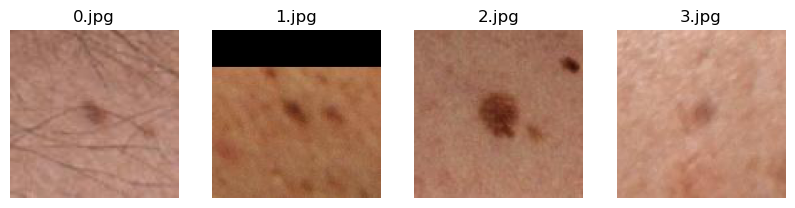

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

fig, axes = plt.subplots(1, 4, figsize = (10, 20))
for i in range(4):
    id = str(df_train["id"][i])
    image = img.imread(os.path.join(project_dir, "train_image", id + ".jpg"))
    axes[i].imshow(image)
    axes[i].set_title(id + ".jpg")
    axes[i].set_axis_off()
plt.show()

***

## Tasks

In this project, you need to work in a team of at most **four** members to build AI models to classify the cancer status (0: negative, 1: positive). The team signup sheet can be found [here](https://docs.google.com/spreadsheets/d/19vqrE4G5LN05zADdiHAZP7pu0W9k9Rob2n2KmxCKlA8/edit?usp=sharing) (you need to use your BU account to access it).

Additionally, before you start the project, you must register for a Kaggle account, join the competition on its [website](https://www.kaggle.com/competitions/isic-2024-challenge/overview), and submit a screenshot of the team tab to Gradescope as a proof.

Since both tabular and image data are provided, you are expected to explore multimodal learning. To be more specific, we expect you to do the following.

- Examine and perform some statistical analysis to the data.
    - For example, you can check the distributions of the features in the metadata and find if there is a simple relation (say, linear relation) between some features and the target variable.
- Design and implement at least one model for each of the following categories:
    - Tabular data model
    - Computer vision model
    - Fusion model
        - A fusion model should combine two models from the previous two categories (one from each category, as "fusion" is defined in class).
- Perform stratified K-fold cross validation to demonstrate the performance of your models and choose your best model to predict the classes of the test samples.
    - While evaluating the performance during cross validation, consider the methods introduced at the beginning of the semester. For example, you should consider ROC analysis and perhaps even AUC analysis (check the ROC wiki page).
- Write a report to record your methods and findings.
    - You are free to choose any tool (Word, LaTex, Notebook, etc.) to write the report. The template is available on our course website.

### Challenges and Tips

We will provide some insights into the data and some ideas to get you started.

#### An (Extremely) Unbalance Dataset

If we compare the numbers of training samples in the negative and positive classes, we will have an astonishing finding.

In [ ]:
counts = [df_train["target"].values.tolist().count(0), df_train["target"].values.tolist().count(1)]
print("Number of negative training samples: " + str(counts[0]))
print("Number of positive training samples: " + str(counts[1]))

Number of negative training samples: 320533
Number of positive training samples: 314


How to tackle this nature of the training set is one of the major problems you need to address during the cross validation. Furthermore, note that we do **NOT** know the label distribution in the test set.

#### Too Many Features

There are about 40 features in the metadata. Some of these features are categorical while some are numerical. The numerical features even have different ranges. Therefore, what features to choose and how to choose the right features are two problems you will face during feature engineering.

#### What Models to Use

We do not put any restriction on model selection on you. In fact, you are encouraged to explore pretrained models (e.g., from PyTorch online library) or even models shared by other competitors (check the code tab, models tab, discussion tab and the leaderboard tab on the competition website).

If you use any of the existing approaches,
Do

- cite the original approach by including links to its post;
- read and understand the approach (you need to explain the approach in your own words while writing the report); and
- verify the author's claims by applying their approach and try improving their method.
    - direct improvemnt of a single approach
    - fusion of different approaches
    - demonstrate how unreliable the approach is by showing, as an example, that their approach is sensitive to fluctuation or outliers in the data

But don't
- load the trained parameters;
    - the parameters here mean the weights trained by the authors
    - you can load model parameters that are not trained on this skin cancer detection task
- copy and paste the entire post to the report.
    - intead, summarize the approach in your own words (this is part of the study process)

## Evaluation

You will be graded mainly based on how much effort you put into this project. We do not ask you to find the solution that yields the perfect predictions (but your solution should at least beat random guessing). Instead, we expect you to explore the data and appcoaches, which should be reflected both in your presentation and your report.

Here is a general breakdown of the grading:

- Performance (10%)
    - Need to at least beat the random guessing
    - Otherwise you will receive a low project grade
- Presentation (20%)
    - The presentation is like a short version of your report:
        - Briefly talk about your approaches
        - Summarize your results and observations
        - Your goal is to let us understand the main parts of your work with little confusion
- Report (70%)
    - Your report doesn't have to be long, but must be complete (30%)
        - You need to complete the sections listed in the template
        - You need to demonstrate your effort into the project
    - Your description should be clear (20%)
        - Do not build a wall of text
        - Do not build a wall of numbers/figures
            - Only choose what matters to the point you are trying to make
            - Always describe the numbers/figures, don't let the readers guess
        - When explaining your approaches and results, using a combination of words and figures can be very helpful
    - Statements should be backed by evidence and reasoning (20%)
        - For example, if you find some interesting relation between A and B, you should show some evidence (say, a correlation plot)